@This notebook is written by Duy Anh Nguyen.

<center>
    <h1>
        Bộ dữ liệu MNIST
    </h1>
</center>

<h3>
    1. Khai báo các thư viện cần thiết
</h3>

In [1]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

<h3>
2. Đọc dữ liệu MNIST
</h3>


Dữ liệu MNIST được lưu trong các file với đuôi dạng `.idx3-ubyte`, có tên lần lượt là:


- `train-images`: Chứa dữ liệu các ảnh chữ số từ 1-9, kích cỡ 28 x 28, dùng cho việc xây dựng mô hình
- `train-labels`: Chứa các nhãn, là các chữ số tương ững của ảnh, , dùng cho việc xây dựng mô hình
- `t10k-images`: Chứa dữ liệu các ảnh chữ số từ 1-9, kích cỡ 28 x 28, dùng cho việc kiểm thử
- `t10k-labels`: Chứa các nhãn, là các chữ số tương ững của ảnh, , dùng cho việc kiểm thử


Ta tiến hành đọc dữ liệu từ các file với sự hỗ trợ từ thư viện **idx2numpy**    


In [2]:
# Đường dẫn tới các file chứa dữ liệu
X_train_dir = './data/train-images.idx3-ubyte'
y_train_dir = './data/train-labels.idx1-ubyte'
X_val_dir = './data/t10k-images.idx3-ubyte'
y_val_dir = './data/t10k-labels.idx1-ubyte'

# 
X_train = idx2numpy.convert_from_file(X_train_dir)
y_train = idx2numpy.convert_from_file(y_train_dir)
X_val = idx2numpy.convert_from_file(X_val_dir)
y_val = idx2numpy.convert_from_file(y_val_dir)


# Kích thước của bộ dữ liệu
print("X-train shape:", X_train.shape)
print("y-train shape:", y_train.shape)
print("X-val shape:", X_val.shape)
print("y-val shape:", y_val.shape)

X-train shape: (60000, 28, 28)
y-train shape: (60000,)
X-val shape: (10000, 28, 28)
y-val shape: (10000,)


Hiển thị trực quan một số ảnh dữ liệu

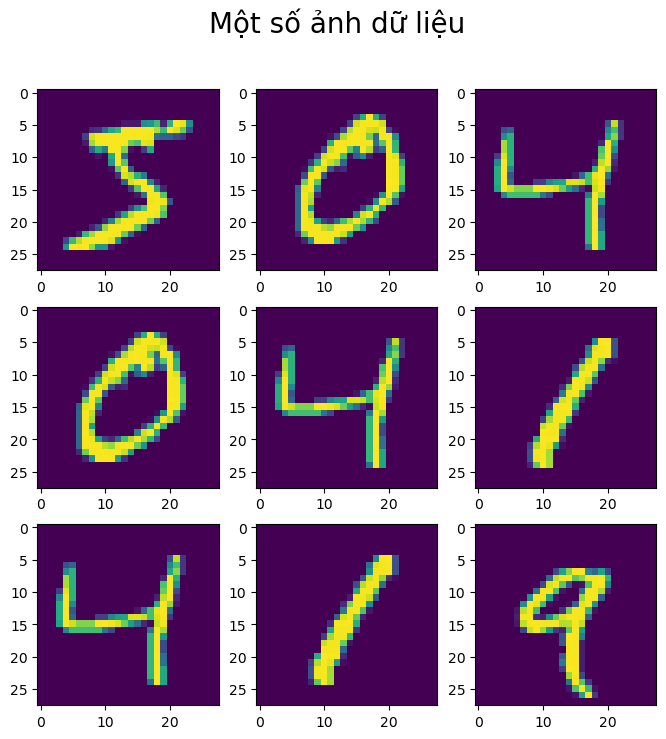

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

for i in range(3):
    for j in range(3):
        axs[i, j].imshow(X_train[i + j])

fig.suptitle("Một số ảnh dữ liệu", fontsize=20)
plt.show()
fig.savefig("MNIST.png")



<h3>
3. Thống kê phân tích đối với bộ dữ liệu MNIST
</h3>

Các chữ số có trong nhãn

In [4]:
print("Các chữ số có trong nhãn của bộ training:")
for item in np.unique(y_train):
    print(item, end=" ")

print()
print("Các chữ số có trong nhãn của bộ validation:")
for item in np.unique(y_val):
    print(item, end=" ")
    

Các chữ số có trong nhãn của bộ training:
0 1 2 3 4 5 6 7 8 9 
Các chữ số có trong nhãn của bộ validation:
0 1 2 3 4 5 6 7 8 9 

Tiếp theo, ta tiến hành đếm tần số xuất hiện của các nhãn (và các ảnh chứa thông tin nhãn) tương ứng trong tổng số 60000 dữ liệu của tập training và 10000 dữ liệu của tập validation

In [5]:
print("Bộ dữ liệu training:")
freq_train = np.bincount(y_train)

print("Số (Nhãn): \t Tần số: \t Tỉ lệ:")
for i, item in enumerate(freq_train):
    print(f"{i}\t\t {item} \t\t {np.round(100 * (item / X_train.shape[0]), 2)}%")



Bộ dữ liệu training:
Số (Nhãn): 	 Tần số: 	 Tỉ lệ:
0		 5923 		 9.87%
1		 6742 		 11.24%
2		 5958 		 9.93%
3		 6131 		 10.22%
4		 5842 		 9.74%
5		 5421 		 9.04%
6		 5918 		 9.86%
7		 6265 		 10.44%
8		 5851 		 9.75%
9		 5949 		 9.92%


In [6]:
print("Bộ dữ liệu validation:")
freq_val = np.bincount(y_val)

print("Số (Nhãn): \t Tần số \t Tỉ lệ:")
for i, item in enumerate(freq_val):
    print(f"{i}\t\t {item} \t\t {np.round(100 * (item / X_val.shape[0]), 2)}%")

Bộ dữ liệu validation:
Số (Nhãn): 	 Tần số 	 Tỉ lệ:
0		 980 		 9.8%
1		 1135 		 11.35%
2		 1032 		 10.32%
3		 1010 		 10.1%
4		 982 		 9.82%
5		 892 		 8.92%
6		 958 		 9.58%
7		 1028 		 10.28%
8		 974 		 9.74%
9		 1009 		 10.09%


Ta có thể trực quan hoá các số liệu này từ biểu đồ histogram dưới đây

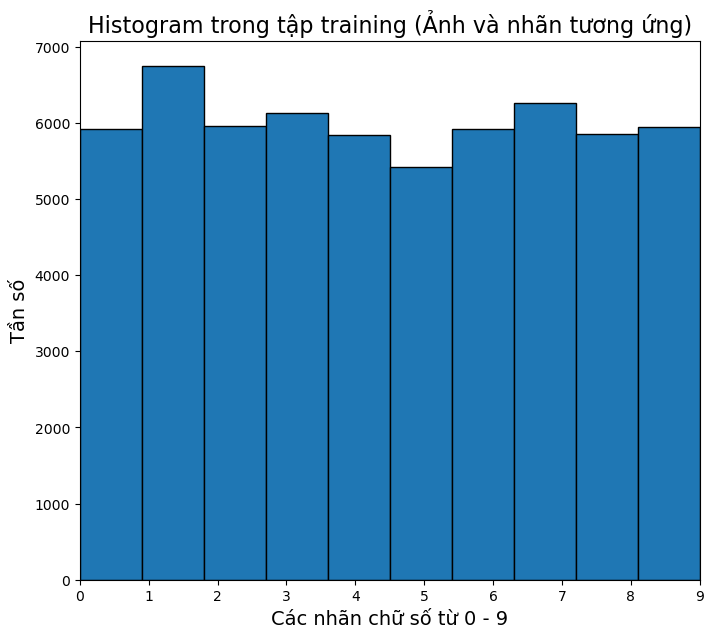

In [15]:
plt.figure(figsize=(8, 7))
plt.xlim(0, 9)
plt.hist(y_train, edgecolor='black')
plt.xlabel("Các nhãn chữ số từ 0 - 9", fontsize=14)
plt.ylabel("Tần số", fontsize=14)
plt.title("Histogram trong tập training (Ảnh và nhãn tương ứng)", fontsize=16)
plt.savefig("hist_train.png")

plt.show()


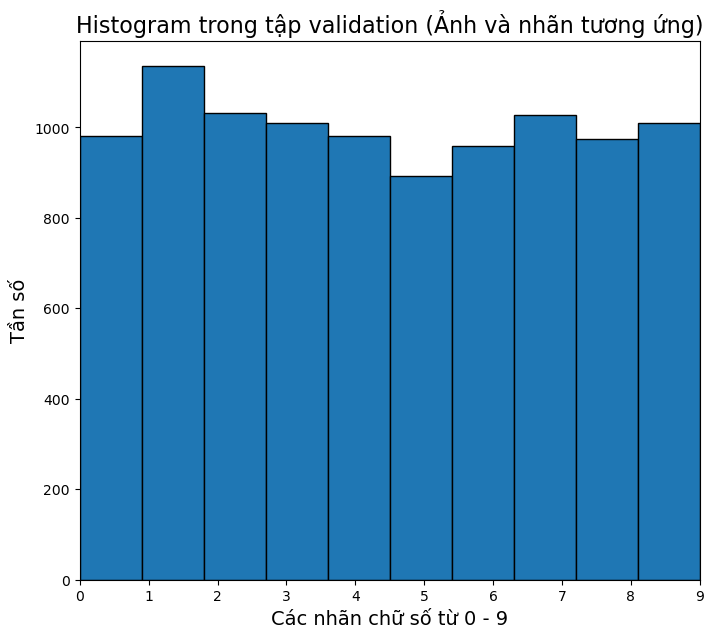

In [14]:
plt.figure(figsize=(8, 7))
plt.xlim(0, 9)
plt.hist(y_val, edgecolor='black')
plt.xlabel("Các nhãn chữ số từ 0 - 9", fontsize=14)
plt.ylabel("Tần số", fontsize=14)
plt.title("Histogram trong tập validation (Ảnh và nhãn tương ứng)", fontsize=16)
plt.savefig("hist_val.png")

plt.show()


--> Từ biểu đồ histgram cùng với tỷ lệ phần trăm số lượng của các nhãn trong hai bộ dữ liệu, cho thấy các bộ dữ liệu khá đồng đều về số lượng các nhãn, không có dữ liệu nhãn nào quá bị lệch so với các nhãn còn lại.

Điều đó cho thấy, bộ dữ liệu MNIST của chúng ta là một bộ dữ liệu đã được chuẩn hoá khá tốt, không bị thiếu dữ liệu, đảm bảo tính đồng nhất về nguồn dữ liệu (các ảnh đều là ảnh số đen trắng với nền đen, nét chữ số trắng) và sự đồng đều trong phân bố các nhãn ở cả tập dữ liệu training và validation.

<center>
    <h1>
        END
    </h1>
</center>